# **Segmentando el Mundo: Binarización y Reconocimiento de Formas**

**Computación visual**

Gabriela Gallegos Rubio

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Número de formas detectadas: 8
Área promedio: 726.94 píxeles
Perímetro promedio: 314.29 píxeles


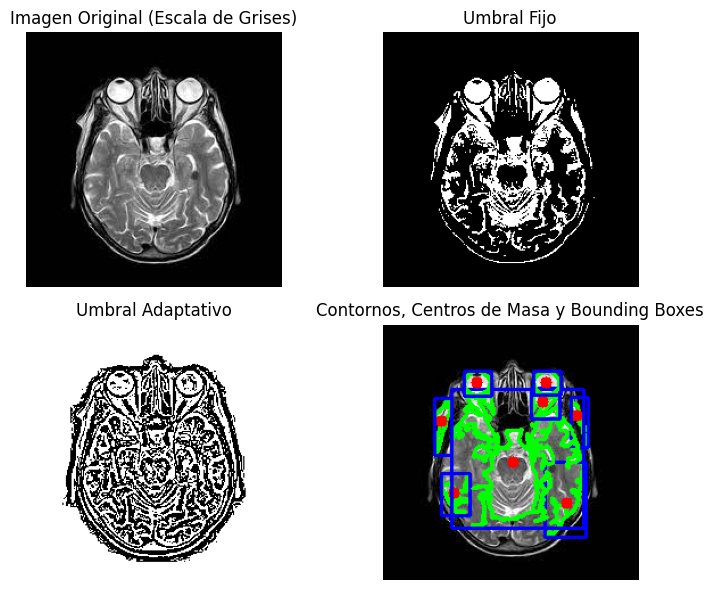

In [17]:
image = cv2.imread('Immed.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Segmentación binaria
# Umbral fijo
_, thresh_fixed = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Umbral adaptativo
thresh_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# 2. Detectar contornos en la imagen con umbral fijo
contours, _ = cv2.findContours(thresh_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 3. Crear una copia en color de la imagen para dibujar contornos
image_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Listas para almacenar métricas
areas = []
perimeters = []
centroids = []
bounding_boxes = []

# 4. Procesar cada contorno
for contour in contours:
    # Calcular área y perímetro
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Filtrar contornos pequeños (ruido)
    if area > 100:
        areas.append(area)
        perimeters.append(perimeter)

        # Calcular centro de masa
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centroids.append((cX, cY))

        # Calcular bounding box
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

        # Dibujar contorno
        cv2.drawContours(image_contours, [contour], -1, (0, 255, 0), 2)
        # Dibujar centro de masa
        cv2.circle(image_contours, (cX, cY), 5, (255, 0, 0), -1)
        # Dibujar bounding box
        cv2.rectangle(image_contours, (x, y), (x + w, y + h), (0, 0, 255), 2)

# 5. Calcular métricas
num_shapes = len(areas)
avg_area = np.mean(areas) if areas else 0
avg_perimeter = np.mean(perimeters) if perimeters else 0

# 6. Visualizar resultados
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original (Escala de Grises)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(thresh_fixed, cmap='gray')
plt.title('Umbral Fijo')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(thresh_adaptive, cmap='gray')
plt.title('Umbral Adaptativo')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_contours)
plt.title('Contornos, Centros de Masa y Bounding Boxes')
plt.axis('off')

plt.tight_layout()
plt.savefig('segmentation_results.png')

# 7. Imprimir métricas
print(f"Número de formas detectadas: {num_shapes}")
print(f"Área promedio: {avg_area:.2f} píxeles")
print(f"Perímetro promedio: {avg_perimeter:.2f} píxeles")